In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, auc

In [2]:
# read data
df = pd.read_csv(r'C:\Users\akrit\Downloads\hotel_bookings.csv\hotel_bookings.csv')

In [4]:
# display the first 5 rows of data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Shape of DataFrame
df.shape

(119390, 32)

In [6]:
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [7]:
# display data columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
nan_feature=[feature for feature in df.columns if df[feature].isnull().sum()>1]
nan_feature

['children', 'country', 'agent', 'company']

In [10]:
df[nan_feature].head()

,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN
2,0.0,GBR,NaN,NaN
3,0.0,GBR,304.0,NaN
4,0.0,GBR,240.0,NaN


In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Categorical feature

In [12]:
cat_feature=[feature for feature in df.columns if df[feature].dtypes=='object']
cat_feature

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [13]:
# Iterate over each categorical feature and print the number of unique values
for feature in cat_feature:
    print(feature, len(df[feature].unique()))

hotel 2
arrival_date_month 12
meal 5
country 178
market_segment 8
distribution_channel 5
reserved_room_type 10
assigned_room_type 12
deposit_type 3
customer_type 4
reservation_status 3
reservation_status_date 926


Numerical feature

In [14]:
num_feature=[feature for feature in df.columns if df[feature].dtypes!='object']
num_feature

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [15]:
cont_num_feature=[feature for feature in num_feature if len(df[feature].unique())> 25]
for feature in cont_num_feature:
    print(feature,len(df[feature].unique()))

lead_time 479
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_week_nights 35
previous_bookings_not_canceled 73
agent 334
company 353
days_in_waiting_list 128
adr 8879


In [16]:
disc_num_feature=[feature for feature in num_feature if len(df[feature].unique())<25]
for feature in disc_num_feature:
    print(feature,len(df[feature].unique()))

is_canceled 2
arrival_date_year 3
stays_in_weekend_nights 17
adults 14
children 6
babies 5
is_repeated_guest 2
previous_cancellations 15
booking_changes 21
required_car_parking_spaces 5
total_of_special_requests 6


In [17]:
#cont_num_feature is a list of continuous numerical feature names
df[cont_num_feature].head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,agent,company,days_in_waiting_list,adr
0,342,27,1,0,0,NaN,NaN,0,0.0
1,737,27,1,0,0,NaN,NaN,0,0.0
2,7,27,1,1,0,NaN,NaN,0,75.0
3,13,27,1,1,0,304.0,NaN,0,75.0
4,14,27,1,2,0,240.0,NaN,0,98.0


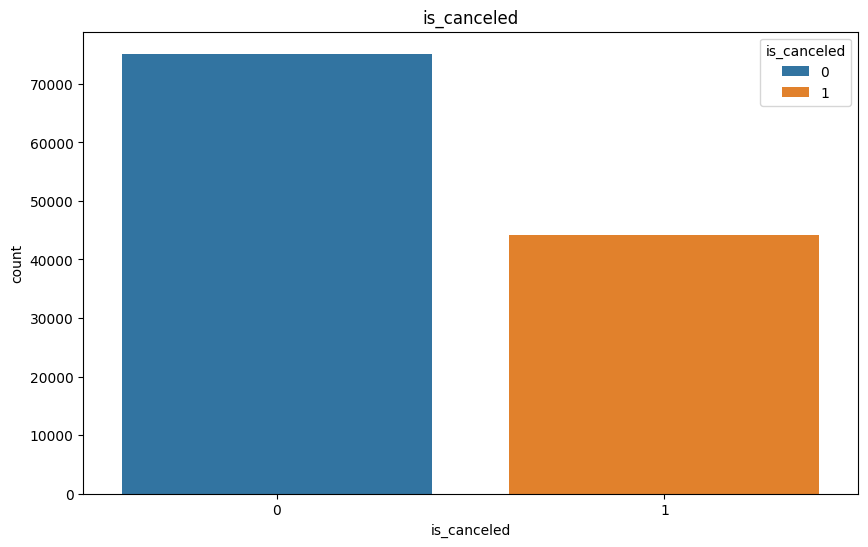

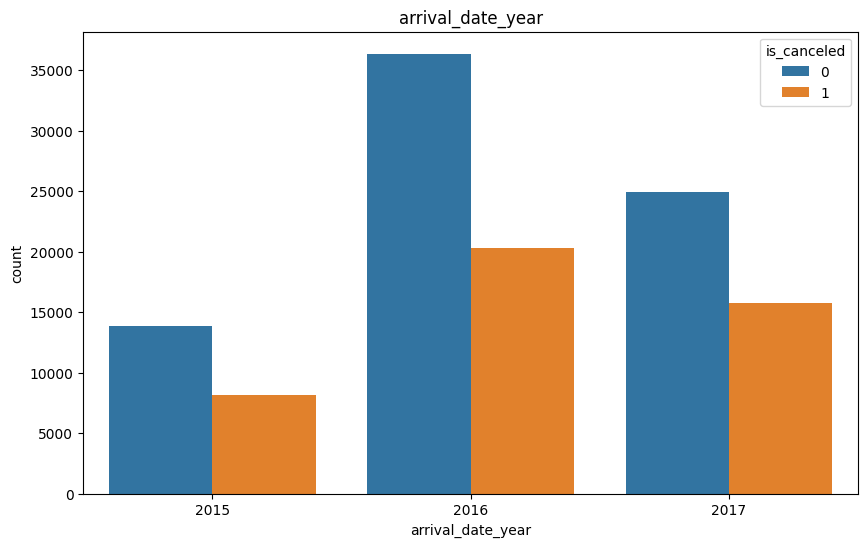

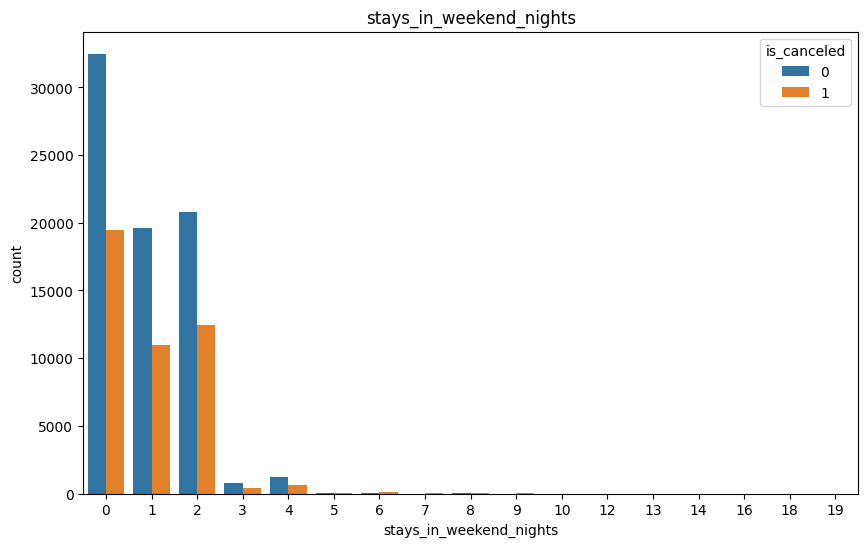

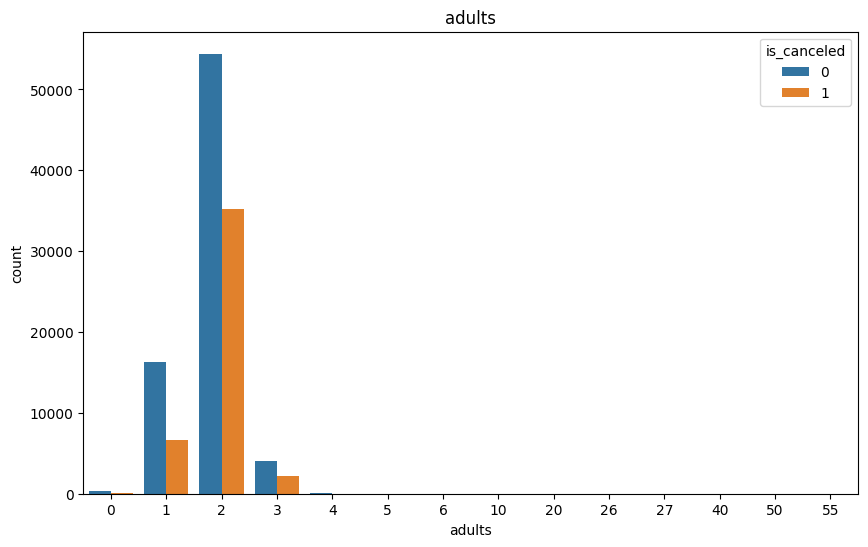

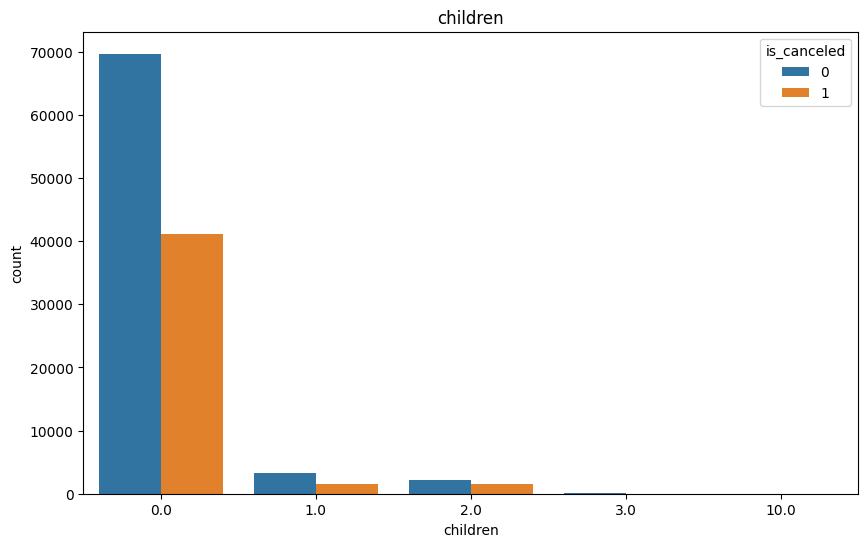

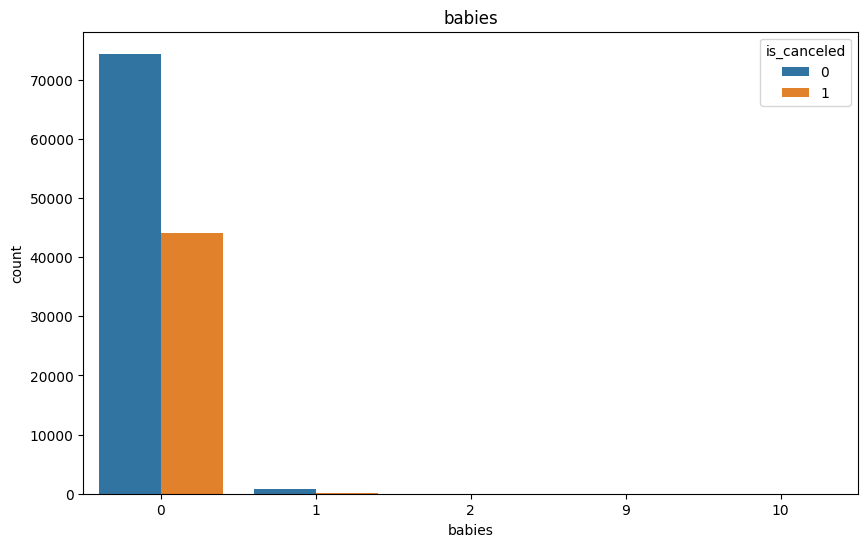

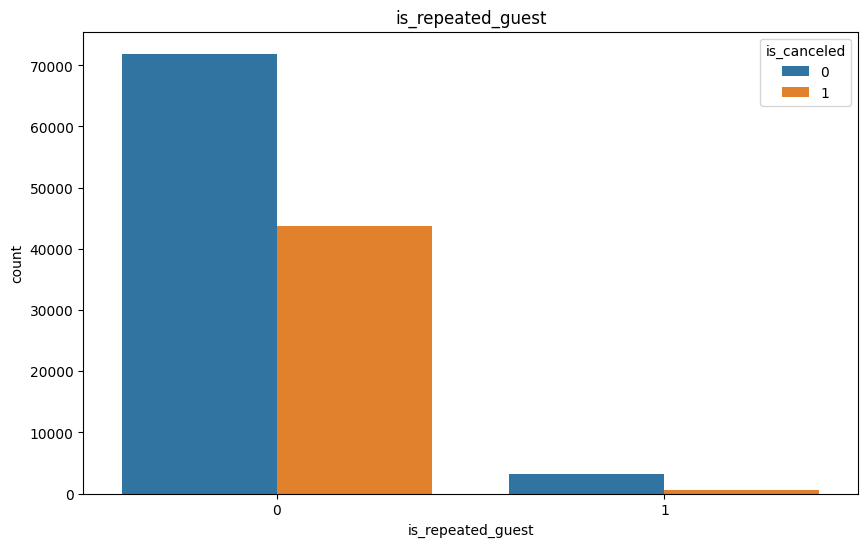

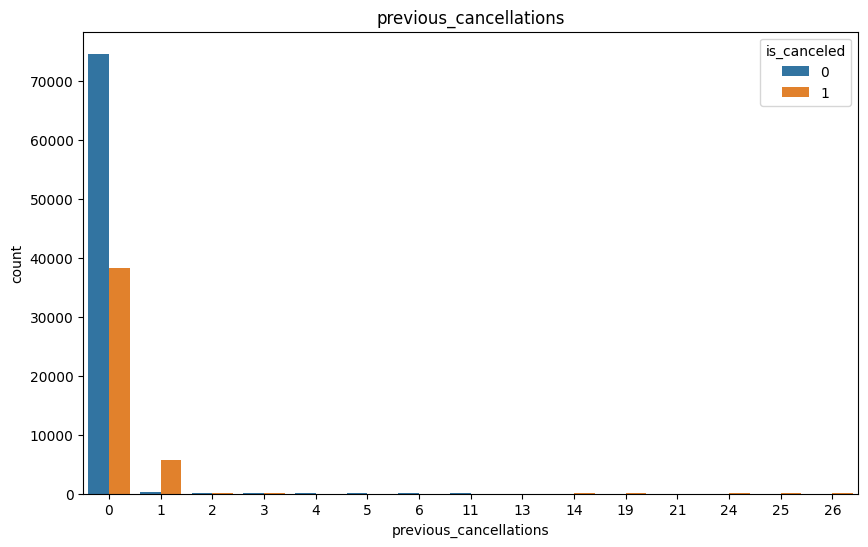

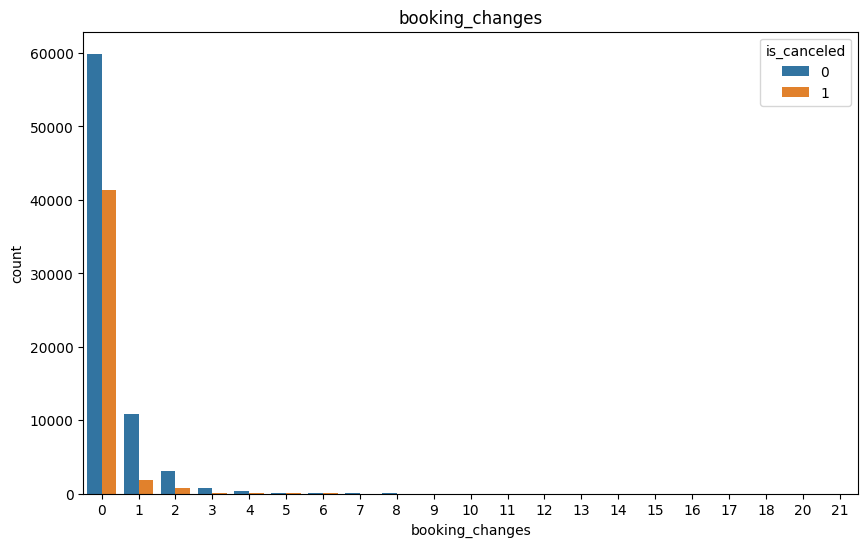

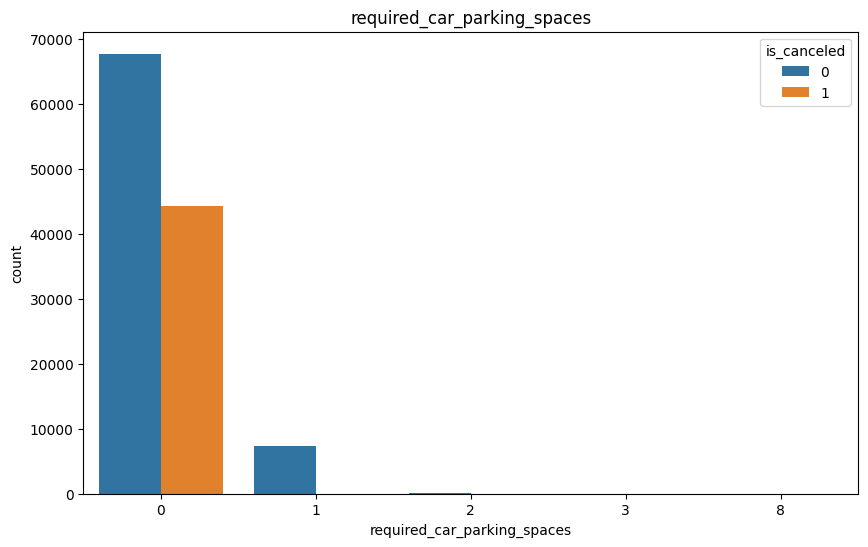

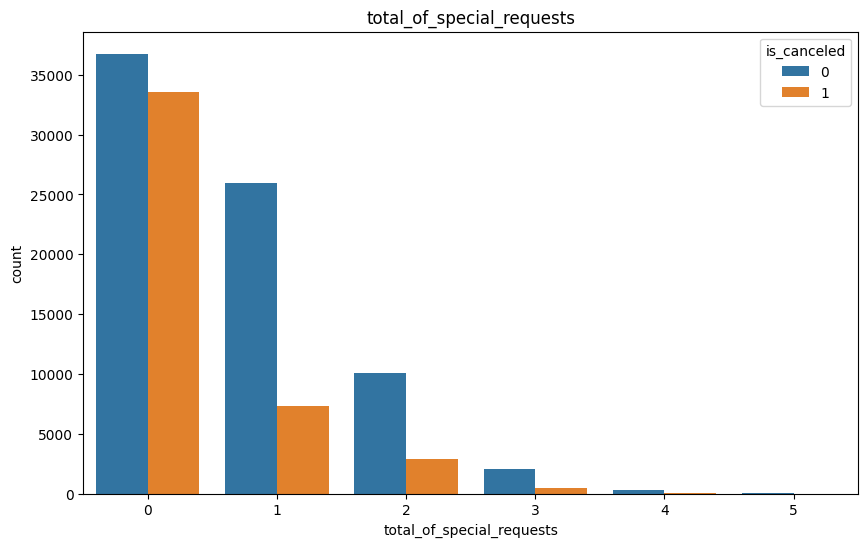

In [18]:
# disc_num_feature is a list of discrete numerical feature names
for feature in disc_num_feature:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature], hue=df['is_canceled'])
    plt.title(feature)
    plt.show()

C:\Users\akrit\AppData\Local\Temp\ipykernel_16696\1713894336.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],kde=False,color='darkblue')


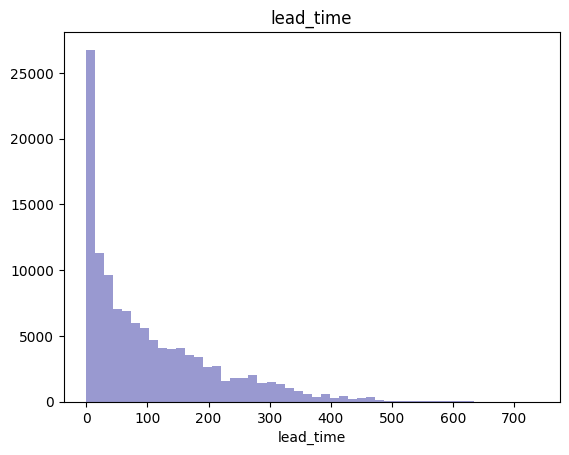

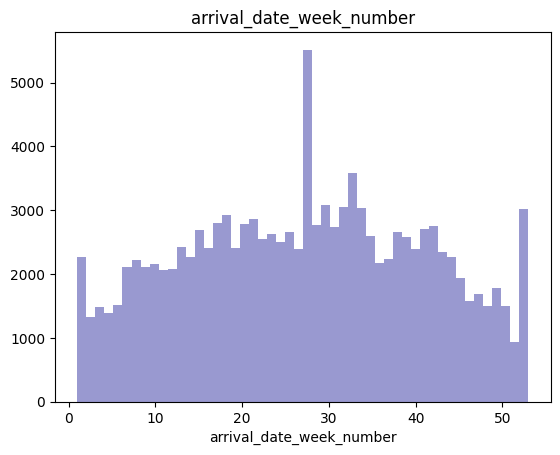

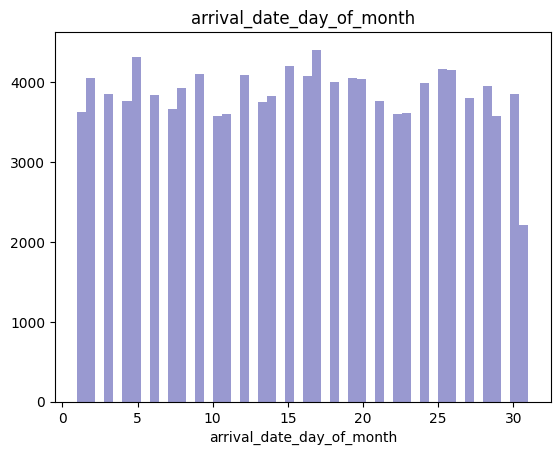

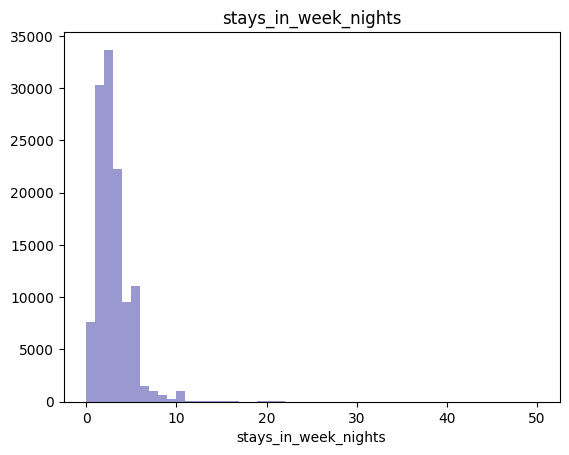

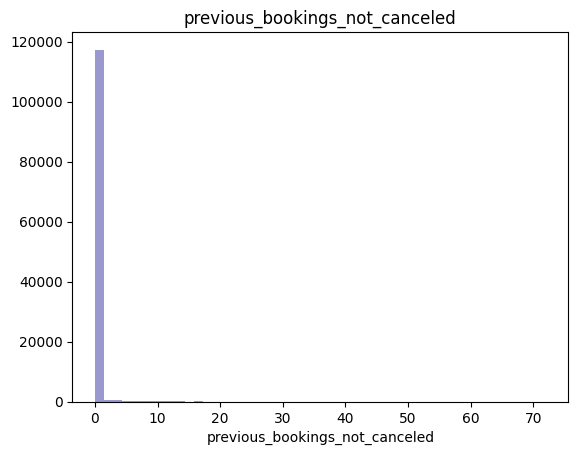

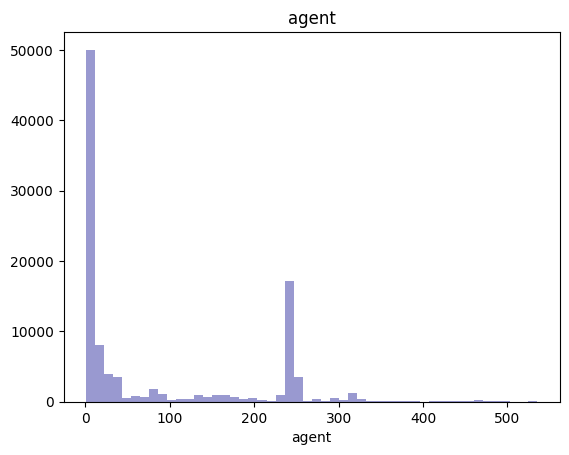

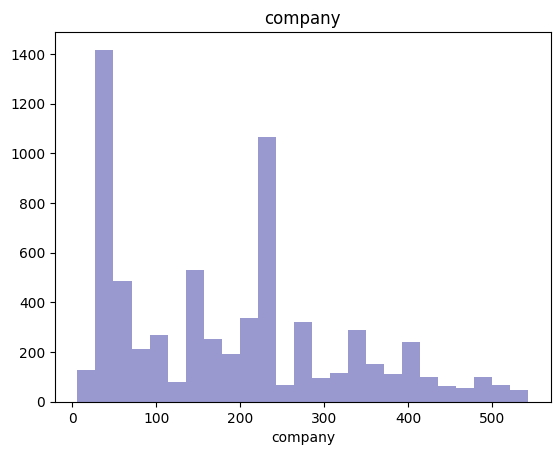

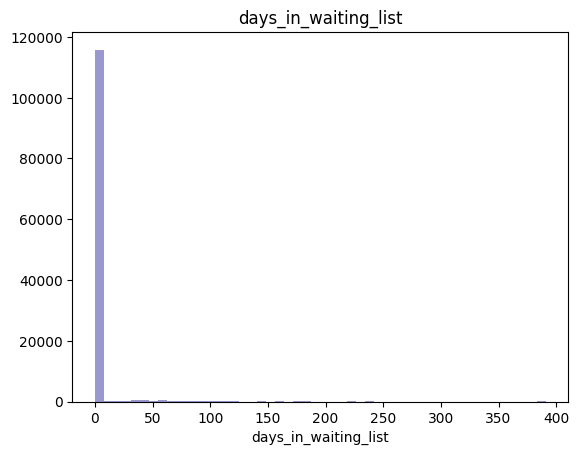

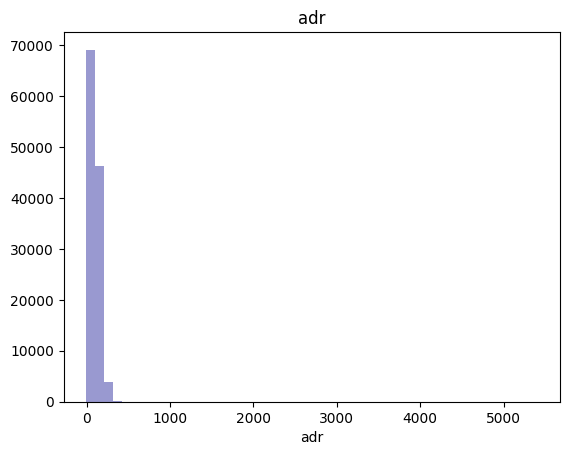

In [19]:
# cont_num_feature is a list of continuous numerical feature names
for feature in cont_num_feature:
    sns.distplot(df[feature],kde=False,color='darkblue')
    plt.title(feature)
    plt.show()

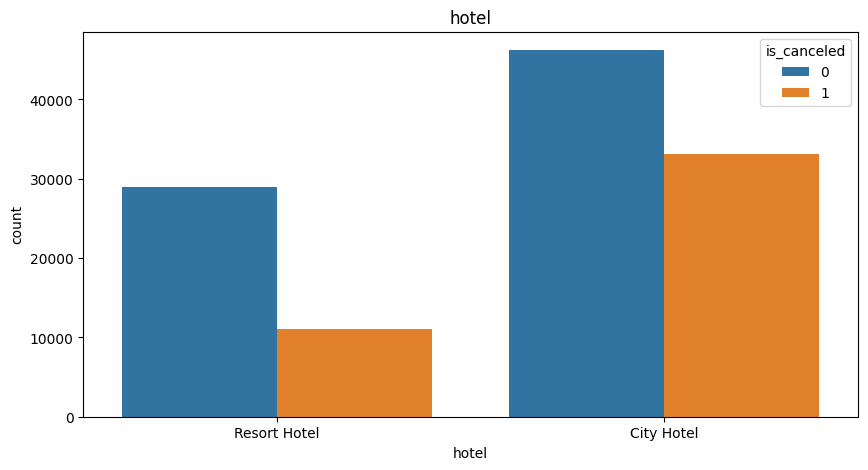

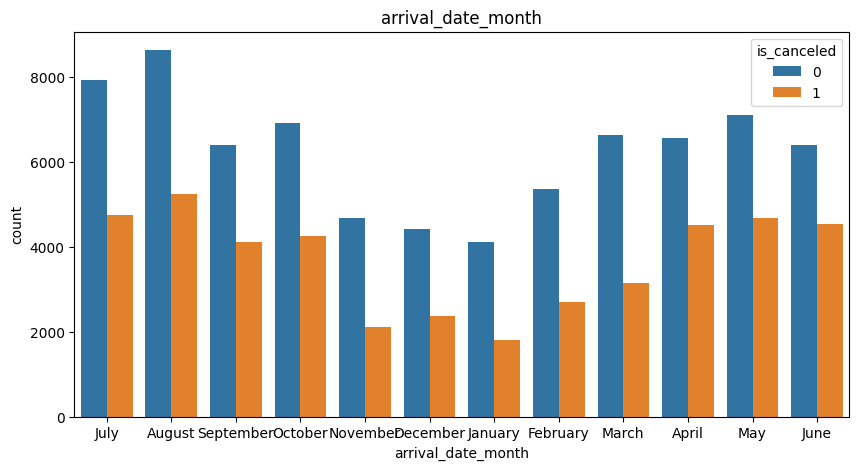

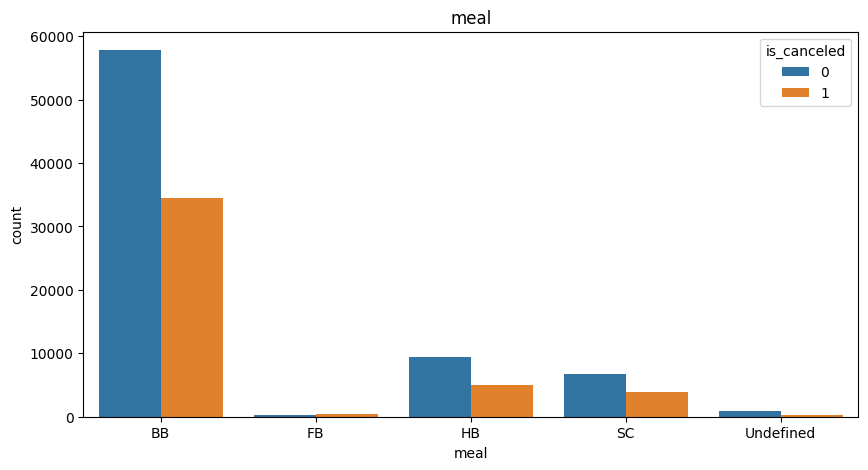

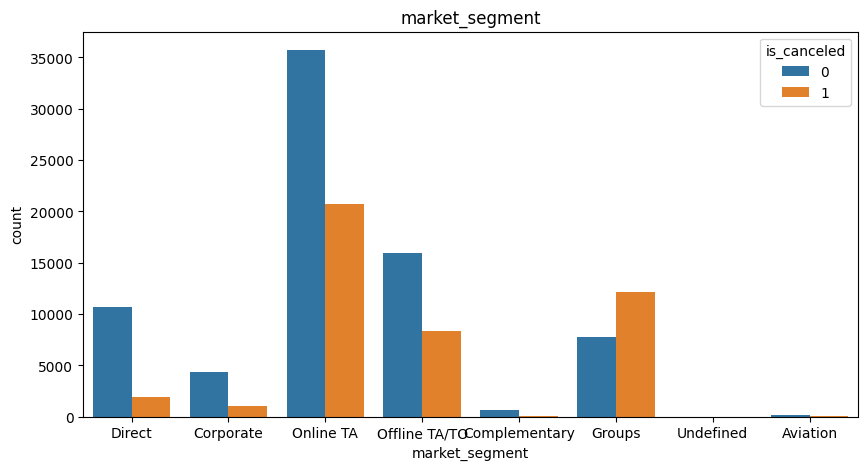

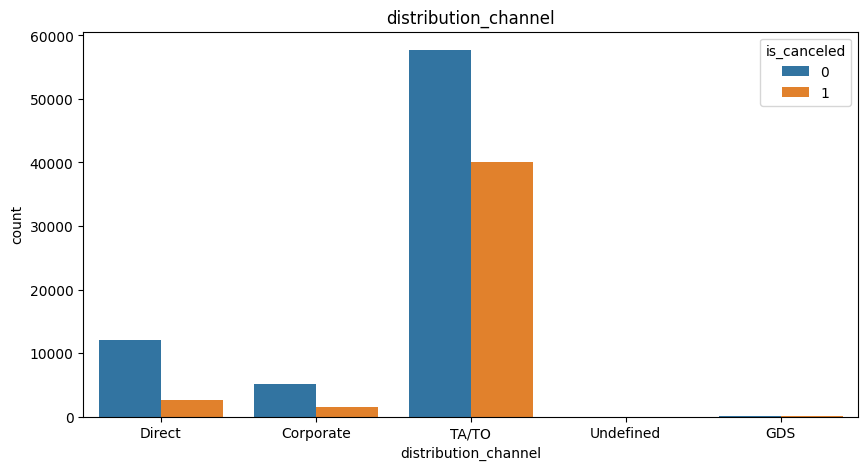

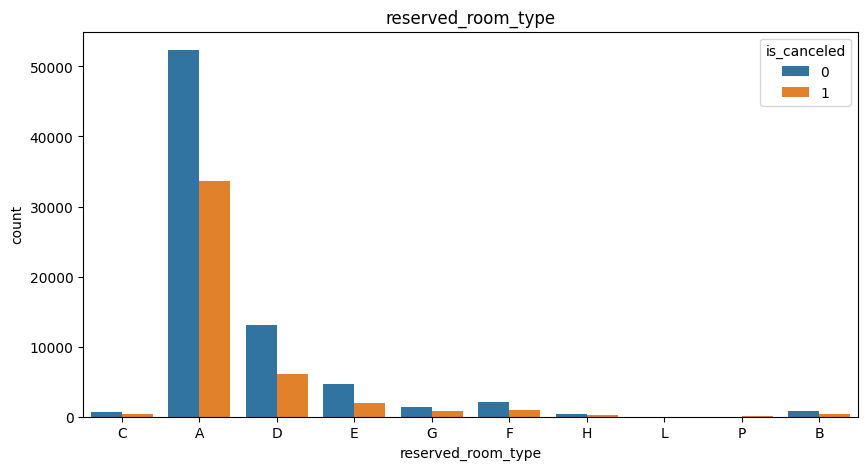

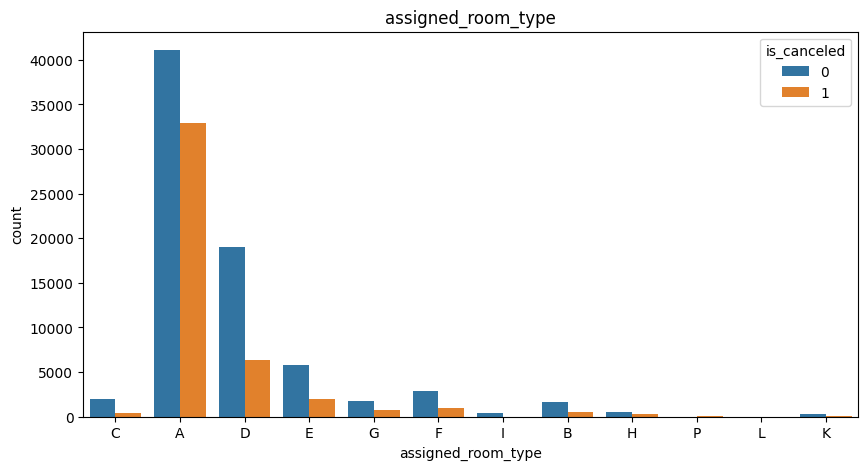

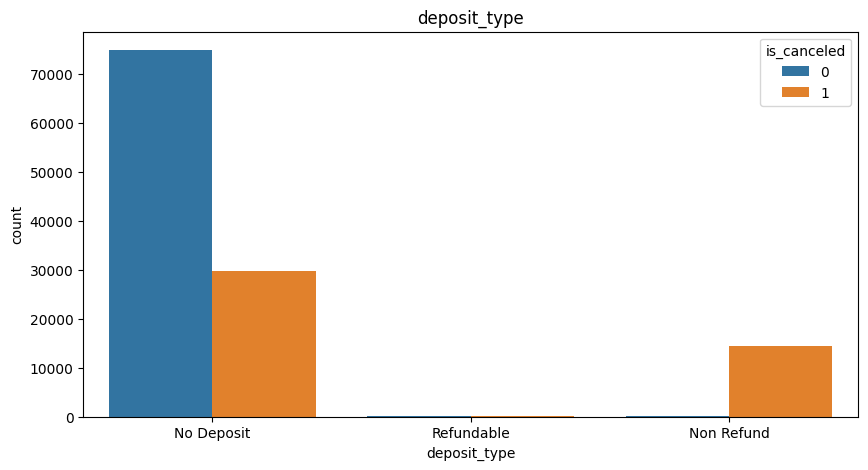

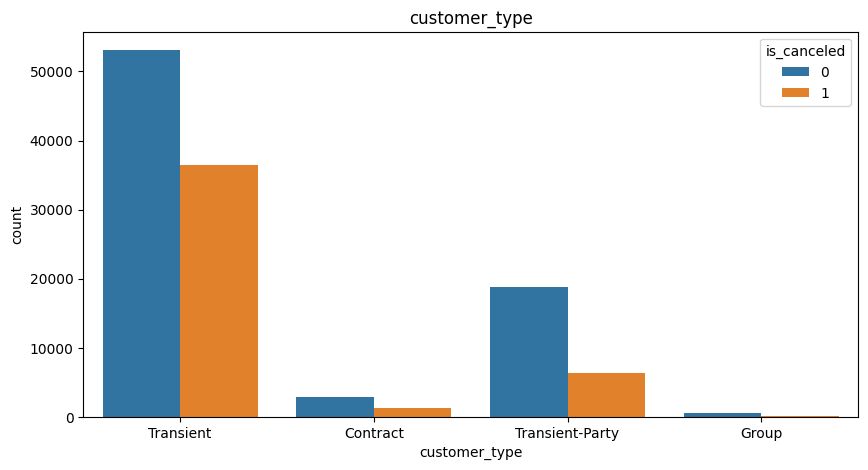

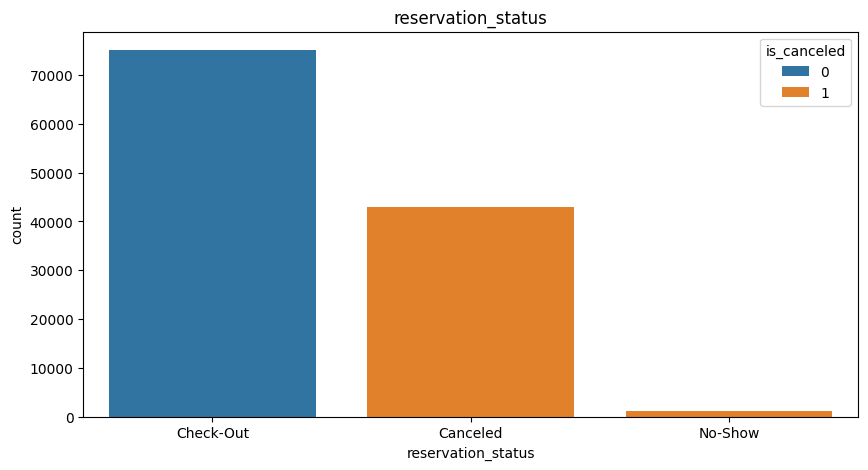

In [20]:
# visualize the distribution of categorical features and their relationship with the cancellation status
cat_feature=[feature for feature in df.columns if df[feature].dtypes=='O']
for feature in cat_feature:
     if feature not in ['reservation_status_date', 'country']:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=df[feature].astype(str), hue=df['is_canceled'].astype(str))
        plt.title(feature)
        plt.show()

C:\Users\akrit\AppData\Local\Temp\ipykernel_16696\1185028236.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sns.countplot(x='country',data=df, order=pd.value_counts(df['country']).iloc[:10].index,palette="brg")
C:\Users\akrit\AppData\Local\Temp\ipykernel_16696\1185028236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country',data=df, order=pd.value_counts(df['country']).iloc[:10].index,palette="brg")


<Axes: xlabel='country', ylabel='count'>

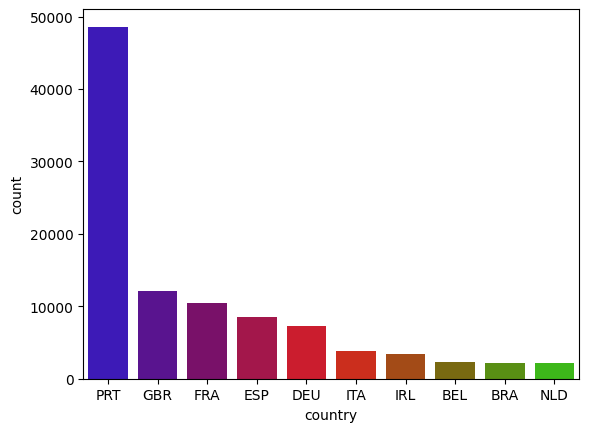

In [21]:
#top 10 countries 
sns.countplot(x='country',data=df, order=pd.value_counts(df['country']).iloc[:10].index,palette="brg")

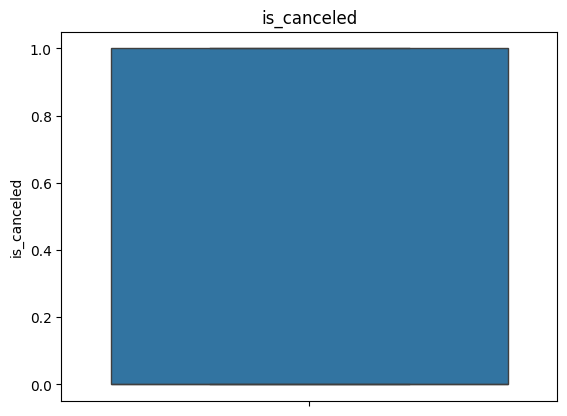

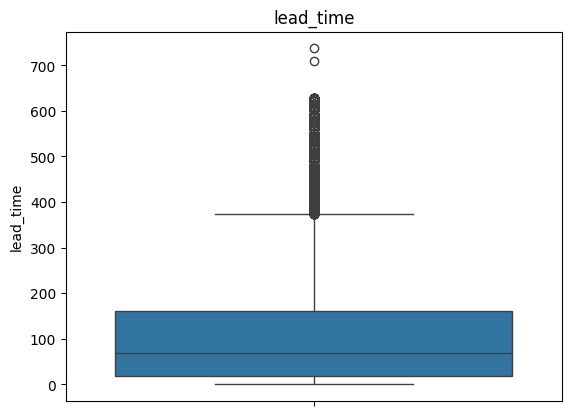

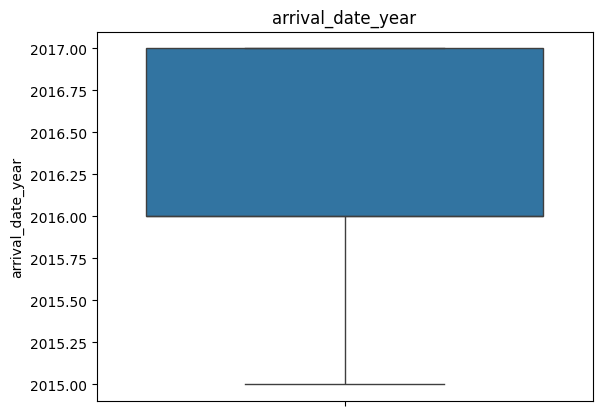

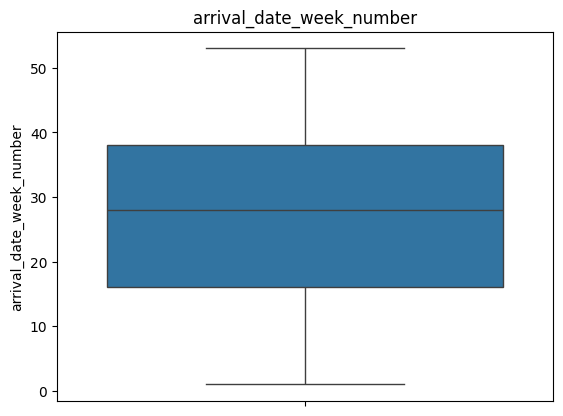

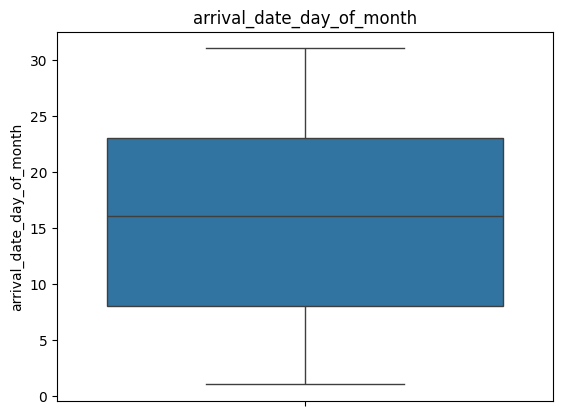

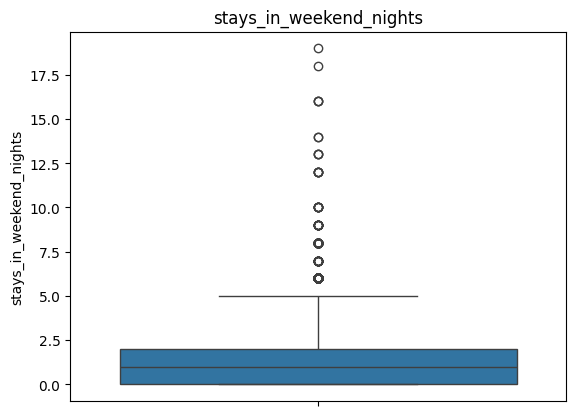

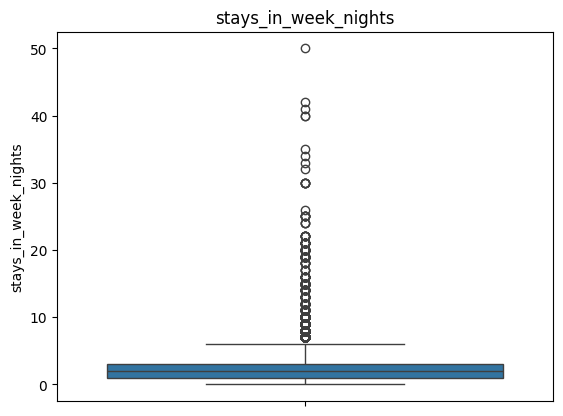

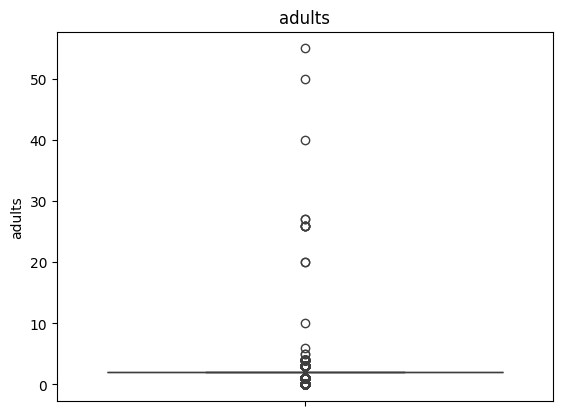

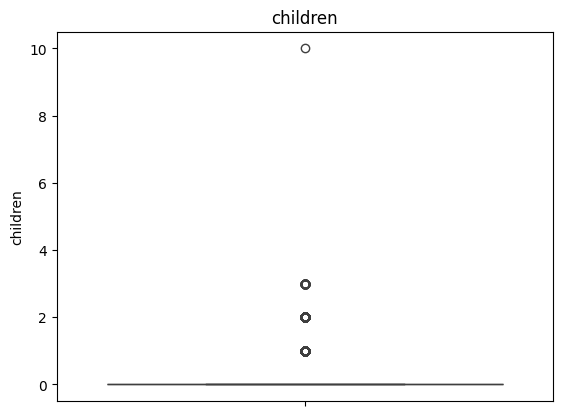

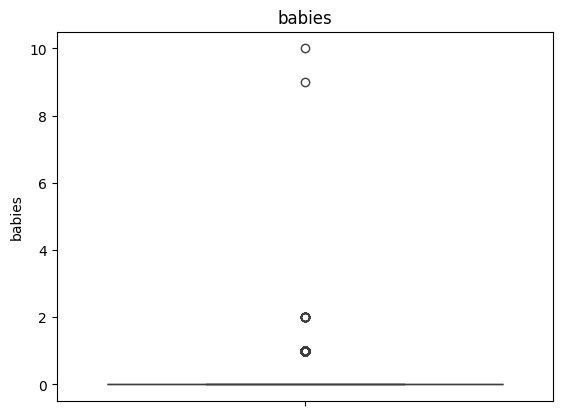

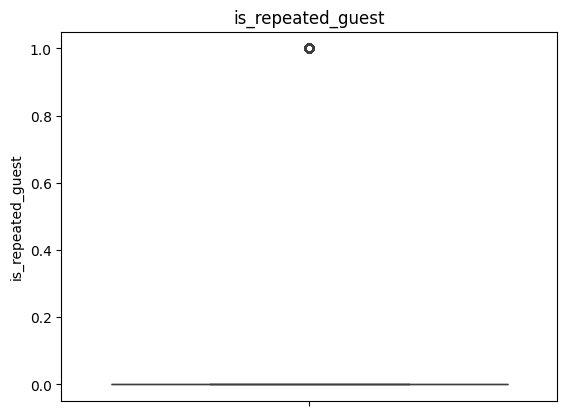

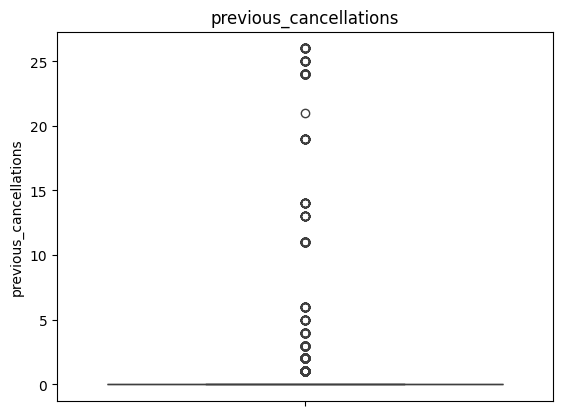

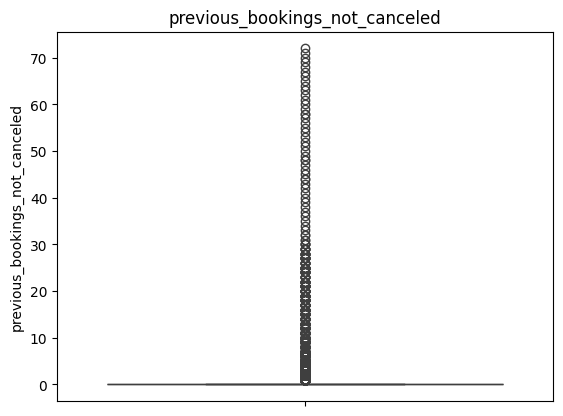

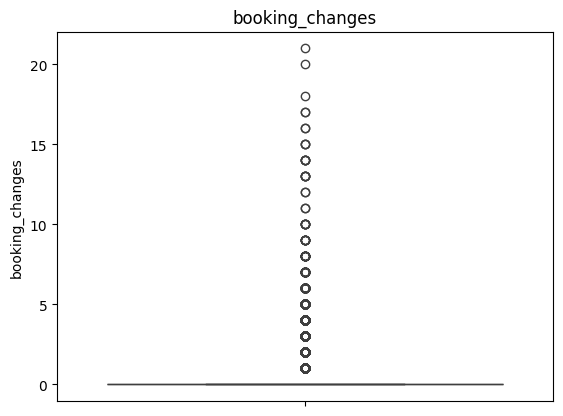

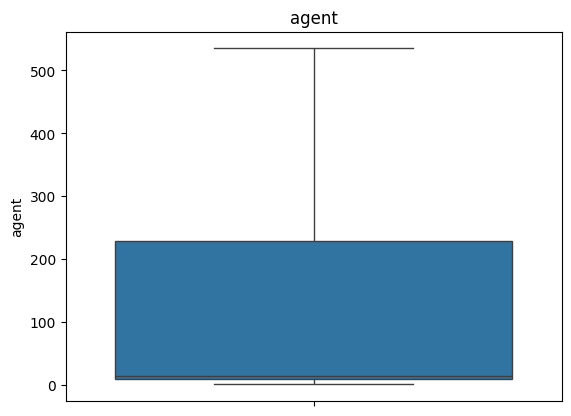

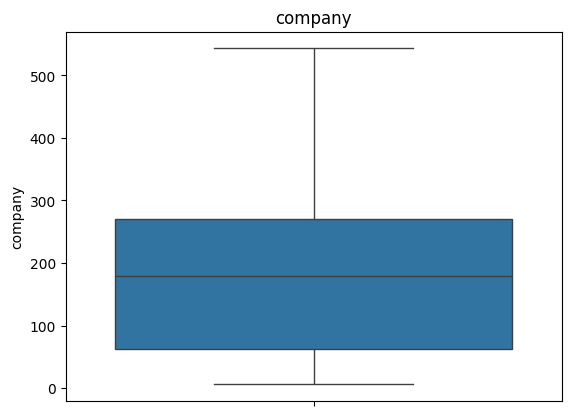

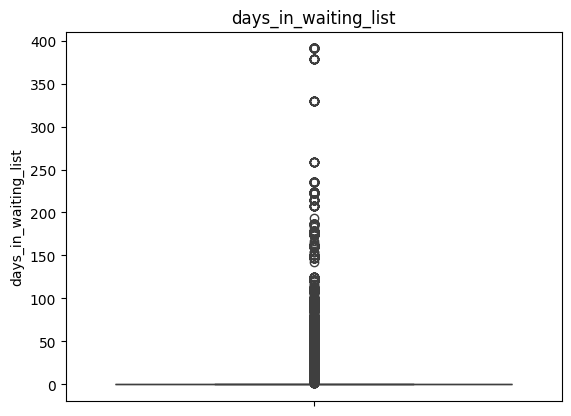

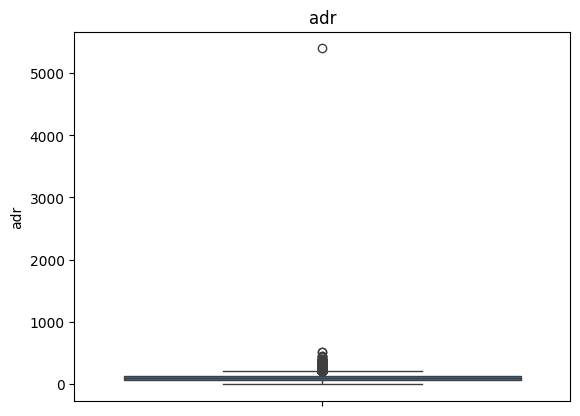

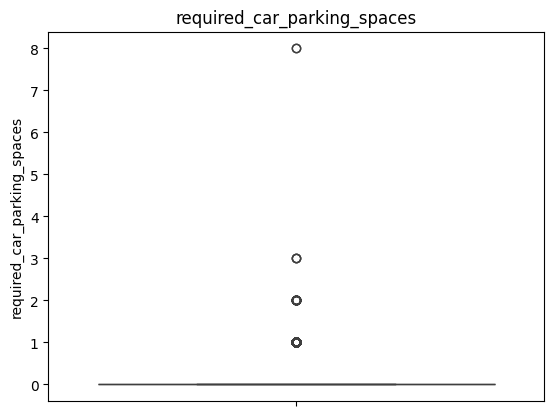

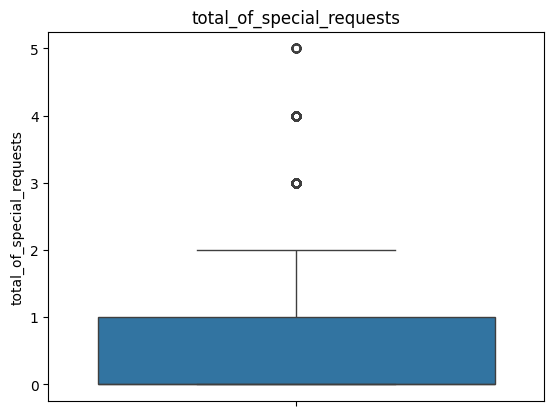

In [22]:
for feature in num_feature:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

Correlation

<Axes: >

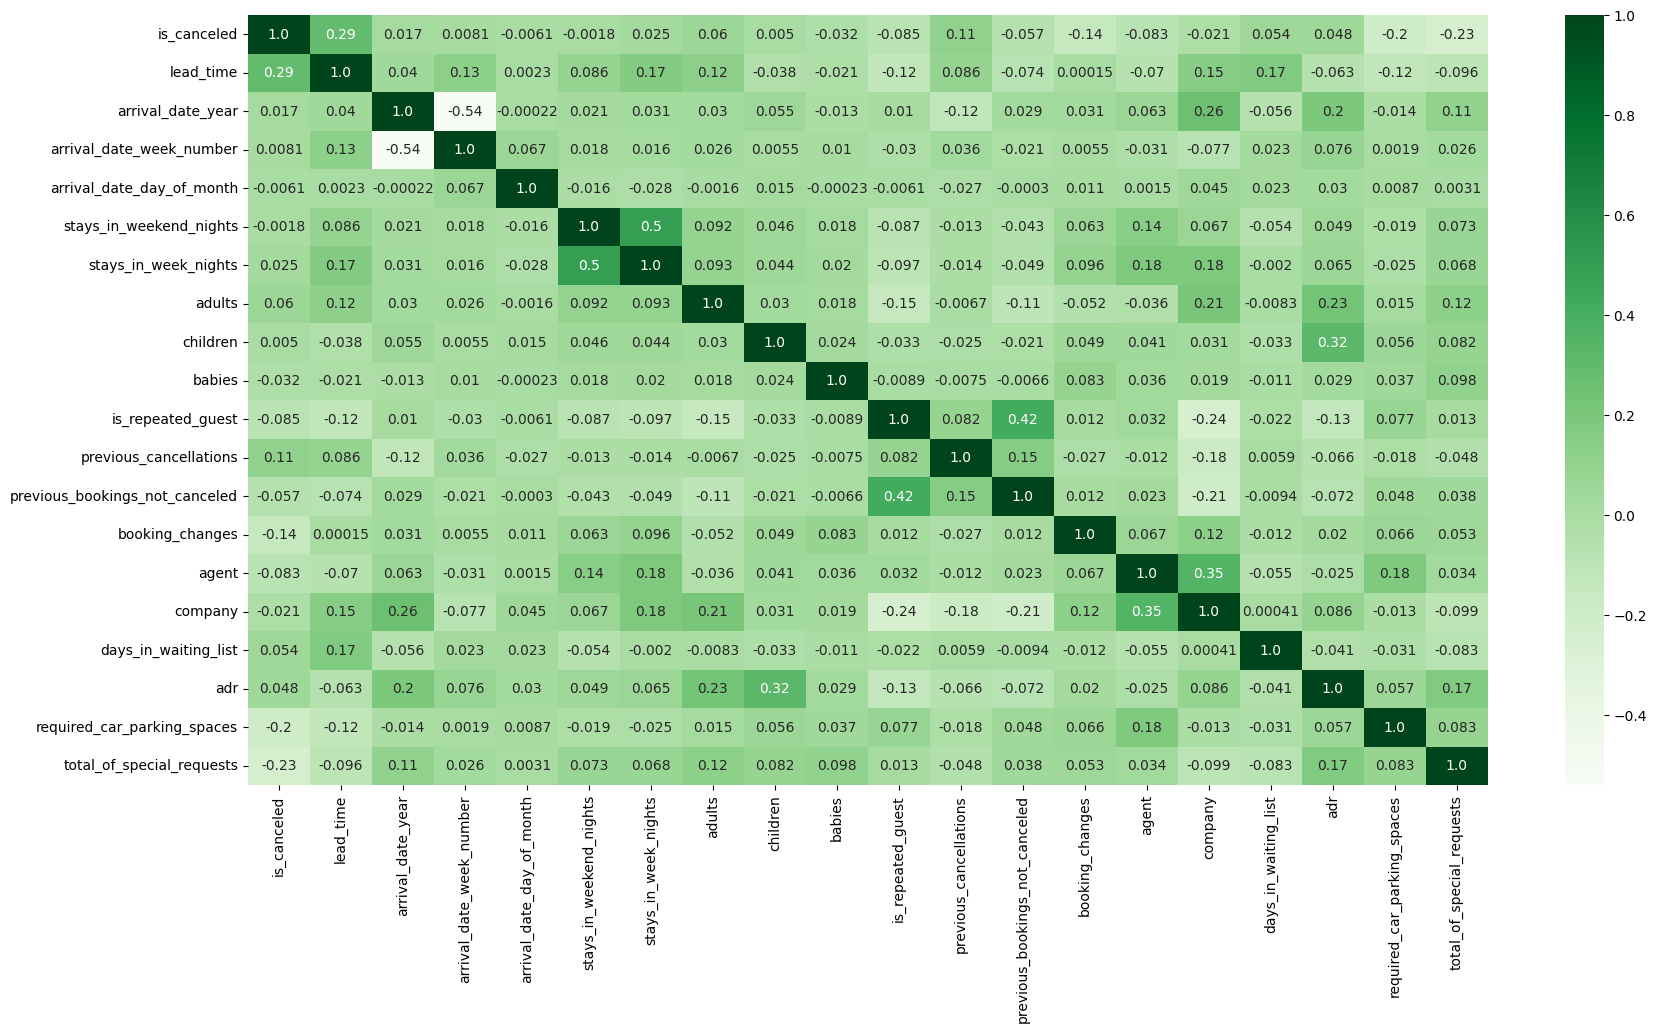

In [23]:
# visual representation of how numerical features are related to each other
cor=df[num_feature].corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='Greens',fmt='.2')

In [24]:
y=df['is_canceled']

In [25]:
X=pd.concat([df['hotel'],df.iloc[:,2:]],axis=1)

In [26]:
print(df['is_canceled'].value_counts())

is_canceled
0    75166
1    44224
Name: count, dtype: int64


In [27]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

Handling missing values

In [29]:
X.drop('company',axis=1,inplace=True)

In [30]:
# identifying which columns may require imputation or other handling techniques for missing values
nan_feature=[feature for feature in X.columns if X[feature].isnull().sum()>1]
nan_feature

['children', 'country', 'agent']

In [31]:
# replace Nan to a new category 'Unknown' in country
X['country']=X['country'].replace(np.nan,'unknown')

In [32]:
# Identify columns with more than 1 missing value
nan_feature=[feature for feature in X.columns if X[feature].isnull().sum()>1]
nan_feature

['children', 'agent']

In [33]:
# replace missing value to median
X['children']=X['children'].replace(np.nan,X['children'].median())

# replace missing value to median
X['agent']=X['agent'].replace(np.nan,X['agent'].median())

# Identify columns with more than 1 missing value
nan_feature=[feature for feature in X.columns if X[feature].isnull().sum()>1]
nan_feature

[]

In [34]:
map_func={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12  }

X['arrival_date_month']=X['arrival_date_month'].map(map_func)

In [35]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,2015,7,27,1,0,0,2,0.0,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,737,2015,7,27,1,0,0,2,0.0,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,7,2015,7,27,1,0,1,1,0.0,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,13,2015,7,27,1,0,1,1,0.0,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,14,2015,7,27,1,0,2,2,0.0,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Handling categorical feature

In [36]:
cat_feature=[feature for feature in X.columns if X[feature].dtypes=='O']
cat_feature

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [37]:
X['arrival_date_month'].head()

0    7
1    7
2    7
3    7
4    7
Name: arrival_date_month, dtype: int64

In [38]:
#dropping unnecessary columns
X.drop(['country',
 'reserved_room_type',
 'assigned_room_type',
 'reservation_status',
 'reservation_status_date',
 'children',
 'babies',
 'adults'],axis=1,inplace=True)

In [39]:
categorical_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']
numerical_cols = [col for col in X.columns if col not in categorical_cols ]

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numerical_cols),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
        
    ]
)

In [40]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,market_segment,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,342,2015,7,27,1,0,0,BB,Direct,...,0,0,3,No Deposit,14.0,0,Transient,0.0,0,0
1,Resort Hotel,737,2015,7,27,1,0,0,BB,Direct,...,0,0,4,No Deposit,14.0,0,Transient,0.0,0,0
2,Resort Hotel,7,2015,7,27,1,0,1,BB,Direct,...,0,0,0,No Deposit,14.0,0,Transient,75.0,0,0
3,Resort Hotel,13,2015,7,27,1,0,1,BB,Corporate,...,0,0,0,No Deposit,304.0,0,Transient,75.0,0,0
4,Resort Hotel,14,2015,7,27,1,0,2,BB,Online TA,...,0,0,0,No Deposit,240.0,0,Transient,98.0,0,1


In [41]:
# split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

Modeling

In [42]:
# Define models
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
rf_model=RandomForestClassifier()

In [43]:
# Create pipelines
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logreg)])
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn)])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_model)])

In [44]:
# Cross-validation to determine which model works best
logreg_scores = cross_val_score(logreg_pipeline, X_train, y_train, scoring='f1', cv=5)
knn_scores = cross_val_score(knn_pipeline, X_train, y_train, scoring='f1', cv=5)
rf_scores = cross_val_score(rf_pipeline, X_train, y_train, scoring='f1', cv=5)

print(f'Logistic Regression Mean F1 Score: {np.mean(logreg_scores)}')
print(f'K-Nearest Neighbors Mean F1 Score: {np.mean(knn_scores)}')
print(f'Random Forest Classifier Mean F1 Score: {np.mean(rf_scores)}')

Logistic Regression Mean F1 Score: 0.6968094294334826
K-Nearest Neighbors Mean F1 Score: 0.744436338853119
Random Forest Classifier Mean F1 Score: 0.8055898585391876


In [45]:
log1 = logreg_pipeline.fit(X_train,y_train)
knn1 = knn_pipeline.fit(X_train,y_train)
rf1 = rf_pipeline.fit(X_train,y_train)

pred_log1 = log1.predict(X_test)
pred_knn1 = knn1.predict(X_test)
pred_rf1 = rf1.predict(X_test)

print(f'Logistic Regression Accuracy Score: {accuracy_score(y_test, pred_log1)}')
print(f'Logistic Regression F1 Score: {f1_score(y_test, pred_log1)}')
print(f'Logistic Regression Precision Score: {precision_score(y_test, pred_log1)}')
print(f'Logistic Regression Recall Score: {recall_score(y_test, pred_log1)}')

print(f'K-Nearest Neighbors Accuracy Score:  {accuracy_score(y_test, pred_knn1)}')
print(f'K-Nearest Neighbors F1 Score:  {f1_score(y_test, pred_knn1)}')
print(f'K-Nearest Neighbors Precision Score:  {precision_score(y_test, pred_knn1)}')
print(f'K-Nearest Neighbors Recall Score:  {recall_score(y_test, pred_knn1)}')

print(f'Random Forest Classifier Accuracy Score: {accuracy_score(y_test, pred_rf1)}')
print(f'Random Forest Classifier F1 Score: {f1_score(y_test, pred_rf1)}')
print(f'Random Forest Classifier Precision Score: {precision_score(y_test, pred_rf1)}')
print(f'Random Forest Classifier Recall Score: {recall_score(y_test, pred_rf1)}')

Logistic Regression Accuracy Score: 0.8084987575732194
Logistic Regression F1 Score: 0.698359646422446
Logistic Regression Precision Score: 0.8446808510638298
Logistic Regression Recall Score: 0.595247020016493
K-Nearest Neighbors Accuracy Score:  0.8254460172543764
K-Nearest Neighbors F1 Score:  0.7552266854592437
K-Nearest Neighbors Precision Score:  0.7903794148979759
K-Nearest Neighbors Recall Score:  0.7230676962291026
Random Forest Classifier Accuracy Score: 0.8710388921461876
Random Forest Classifier F1 Score: 0.8155866970096219
Random Forest Classifier Precision Score: 0.8723949436282884
Random Forest Classifier Recall Score: 0.7657245670589999


In [46]:
logreg_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance']
}

rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [47]:
# Set up GridSearchCV for each model
logreg_gs = GridSearchCV(logreg_pipeline, param_grid=logreg_param_grid, scoring='f1', cv=5)
knn_gs = GridSearchCV(knn_pipeline, param_grid=knn_param_grid, scoring='f1', cv=5)
rf_gs = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, scoring='f1', cv=5)

In [48]:
# Fit GridSearchCV to the data
logreg_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'arrival_date_year',
                                                                          'arrival_date_month',
                                                                          'arrival_date_week_number',
                                                                          'arrival_date_day_of_month',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'is_repeated_guest',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_cancel...
                                                                          'days_in_waiting_list',
                                                                          'adr',
                                                                          'required_car_parking_spaces',
                                                                          'total_of_special_requests']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['hotel',
                                                                          'meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'deposit_type',
                                                                          'customer_type'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100]},
             scoring='f1')

In [49]:
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'arrival_date_year',
                                                                          'arrival_date_month',
                                                                          'arrival_date_week_number',
                                                                          'arrival_date_day_of_month',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'is_repeated_guest',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_cancel...
                                                                          'required_car_parking_spaces',
                                                                          'total_of_special_requests']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['hotel',
                                                                          'meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'deposit_type',
                                                                          'customer_type'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [3, 5, 7, 9],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1')

In [50]:
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scale',
                                                                         StandardScaler(),
                                                                         ['lead_time',
                                                                          'arrival_date_year',
                                                                          'arrival_date_month',
                                                                          'arrival_date_week_number',
                                                                          'arrival_date_day_of_month',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'is_repeated_guest',
                                                                          'previous_cancellations',
                                                                          'previous_bookings_not_cancel...
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['hotel',
                                                                          'meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'deposit_type',
                                                                          'customer_type'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='f1')

In [51]:
# Get the best models
best_logreg = logreg_gs.best_estimator_
best_knn = knn_gs.best_estimator_
best_rf = rf_gs.best_estimator_

In [52]:
# Print the best parameters for each model
print(f'Best Logistic Regression parameters: {logreg_gs.best_params_}')
print(f'Best K-Nearest Neighbors parameters: {knn_gs.best_params_}')
print(f'Best Random Forest parameters: {rf_gs.best_params_}')

Best Logistic Regression parameters: {'classifier__C': 0.1}
Best K-Nearest Neighbors parameters: {'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}
Best Random Forest parameters: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


In [53]:
# Predict on the test set with the best models
y_pred_logreg = best_logreg.predict(X_test)
y_pred_knn = best_knn.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

y_pred_prob_logreg = best_logreg.predict_proba(X_test)[:, 1]
y_pred_prob_knn = best_knn.predict_proba(X_test)[:, 1]
y_pred_prob_rf = best_rf.predict_proba(X_test)[:, 1]

In [54]:
# Logistic Regression
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix")
print(confusion_matrix(y_test, y_pred_logreg))
print(f'Logistic Regression Accuracy Score: {accuracy_score(y_test, y_pred_logreg)}')
print(f'Logistic Regression Precision Score: {precision_score(y_test, y_pred_logreg)}')
print(f'Logistic Regression Recall Score: {recall_score(y_test, y_pred_logreg)}')
print(f'Logistic Regression F1 Score: {f1_score(y_test, y_pred_logreg)}')

# K-Nearest Neighbors
print("\nK-Nearest Neighbors Classification Report")
print(classification_report(y_test, y_pred_knn))
print("K-Nearest Neighbors Confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn))
print(f'K-Nearest Neighbors Accuracy Score: {accuracy_score(y_test, y_pred_knn)}')
print(f'K-Nearest Neighbors Precision Score: {precision_score(y_test, y_pred_knn)}')
print(f'K-Nearest Neighbors Recall Score: {recall_score(y_test, y_pred_knn)}')
print(f'K-Nearest Neighbors F1 Score: {f1_score(y_test, y_pred_knn)}')

# Random Forest Classifier
print("\nRandom Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))
print(f'Random Forest Classifier Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')
print(f'Random Forest Classifier Precision Score: {precision_score(y_test, y_pred_rf)}')
print(f'Random Forest Classifier Recall Score: {recall_score(y_test, y_pred_rf)}')
print(f'Random Forest Classifier F1 Score: {f1_score(y_test, y_pred_rf)}')

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.80      0.94      0.86     22478
           1       0.85      0.60      0.70     13339

    accuracy                           0.81     35817
   macro avg       0.82      0.77      0.78     35817
weighted avg       0.82      0.81      0.80     35817

Logistic Regression Confusion Matrix
[[21041  1437]
 [ 5390  7949]]
Logistic Regression Accuracy Score: 0.809392188067119
Logistic Regression Precision Score: 0.8468996377583635
Logistic Regression Recall Score: 0.5959217332633631
Logistic Regression F1 Score: 0.6995819581958196

K-Nearest Neighbors Classification Report
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     22478
           1       0.83      0.75      0.79     13339

    accuracy                           0.85     35817
   macro avg       0.84      0.83      0.84     35817
weighted avg       0.85      0.85   

In [55]:
# ROC Curves and AUC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Precision-Recall Curves
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_pred_prob_logreg)
average_precision_logreg = average_precision_score(y_test, y_pred_prob_logreg)

precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_prob_knn)
average_precision_knn = average_precision_score(y_test, y_pred_prob_knn)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)
average_precision_rf = average_precision_score(y_test, y_pred_prob_rf)

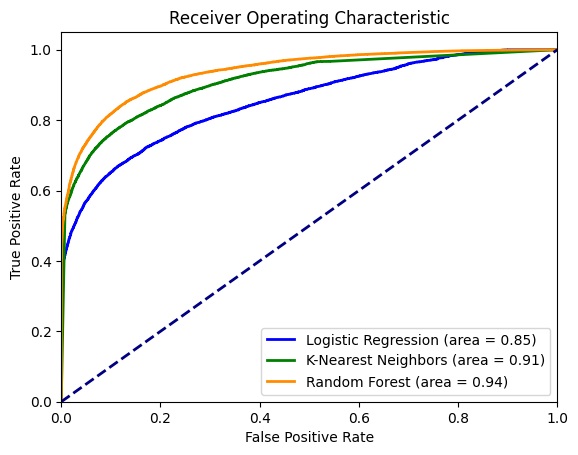

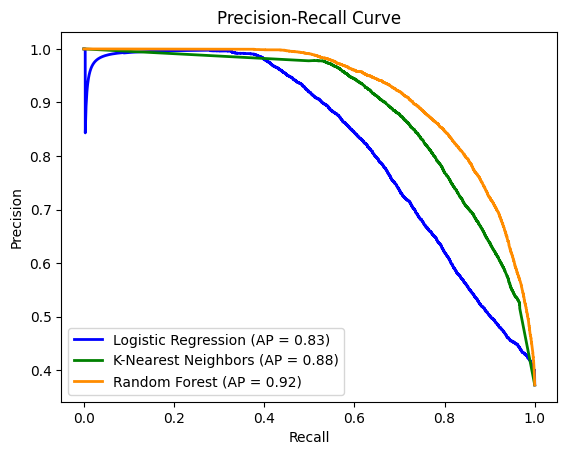

In [56]:
# Plot ROC Curves
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='K-Nearest Neighbors (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curves
plt.figure()
plt.plot(recall_logreg, precision_logreg, color='blue', lw=2, 
         label=f'Logistic Regression (AP = {average_precision_logreg:.2f})')
plt.plot(recall_knn, precision_knn, color='green', lw=2, 
         label=f'K-Nearest Neighbors (AP = {average_precision_knn:.2f})')
plt.plot(recall_rf, precision_rf, color='darkorange', lw=2, 
         label=f'Random Forest (AP = {average_precision_rf:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

Plotting the confusion matrix for the best model(RF)

<Axes: >

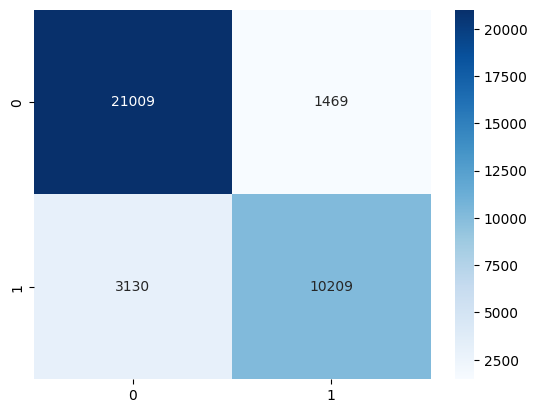

In [57]:
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')

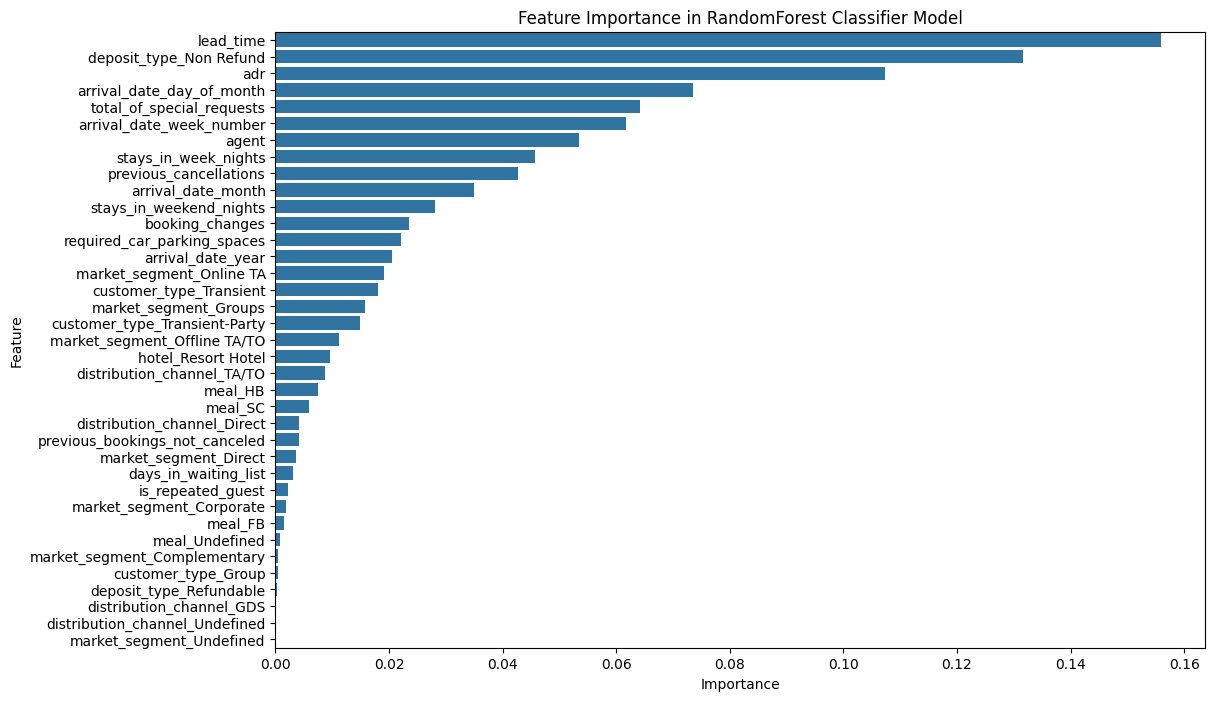

In [58]:
# Get the column transformer
preprocessor = rf_pipeline.named_steps['preprocessor']

# Get the feature names from all transformers within the column transformer
feature_names = []

for name, transformer, columns in preprocessor.transformers_:
    if transformer == 'drop' or transformer == 'passthrough':
        continue
    if hasattr(transformer, 'get_feature_names_out'):
        feature_names.extend(transformer.get_feature_names_out(columns))
    else:
        feature_names.extend(columns)

# Extract feature importance from the RandomForestClassifier
feature_importance = rf_pipeline.named_steps['classifier'].feature_importances_

# Ensure the lengths match
assert len(feature_names) == len(feature_importance), "Feature names and importances must have the same length"

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in RandomForest Classifier Model')
plt.show()